# classification male/female
<B> in this dataset,I have chosen to deal with the gender classification of human beings based on facial structure

In [172]:
import numpy as np 
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 
from numpy import cov

In [173]:
person=pd.read_csv('/Users/ortal/Desktop/OneDrive - Ariel University/שיעורים/AI/proiect/dataset/gender_classification_v7.csv')
person


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


<B> Explanation of features

<b>long hair:</b> boolean features. if the hair is short=0, if it's long=1.\
<b>forehead_width_cm:</b> the width of the forehead in cm.\
<b>forehead_height_cm:</b>the hught of the forehead in cm.\
<b>nose_wide:</b>boolean features. if the nose is wide=1, if it's thin=0.\
<b>nose_long:</b>boolean features. if the nose is short=0, if it's long=1.\
<b>lips_thin:</b>boolean features. if the lips are thin =1, if they width=0.\
<b>distance_nose_to_lip_long:</b> boolean features. if the distance between the nose and the lip is short=0, if it's long=1.\
gender: male or female\

<B>Note - I did not find according to what the ratio is defined as long and short, and therefore please assume that it was defined after a general average calculation of the relevant parameters in the population 

    
    

In [174]:
#  check if there is null, get basic information about the data
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


There is 5000 raws and 8 columns. 
There is no null values in this dataFrame

Note that "gender" is categorical feature, so lets change it to numerical:
males=0 females=1:

In [175]:
person['gender_code']=pd.factorize(person.gender)[0]
person.gender_code.value_counts()

1    2501
0    2500
Name: gender_code, dtype: int64

In [176]:
person.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,gender_code
0,1,11.8,6.1,1,0,1,1,Male,0
1,0,14.0,5.4,0,0,1,0,Female,1
2,0,11.8,6.3,1,1,1,1,Male,0
3,0,14.4,6.1,0,1,1,1,Male,0
4,1,13.5,5.9,0,0,0,0,Female,1


<B>now we can see that there is 2501 sumples of males and 2500 sumples of females.



In [177]:
person.groupby(['gender_code']).mean()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
gender_code,,,,,,,
0,0.866000,13.551440,6.096360,0.873200,0.880000,0.864800,0.876400
1,0.873251,12.811675,5.796321,0.114754,0.135946,0.121551,0.121551


להגדיר יותר טוב את ציר הוואי לפי הפרמטקים הנכונים ןלהצליח לסדר את הגודל של הגרף כך שהמקרא יתאים.

<Figure size 1440x1440 with 0 Axes>

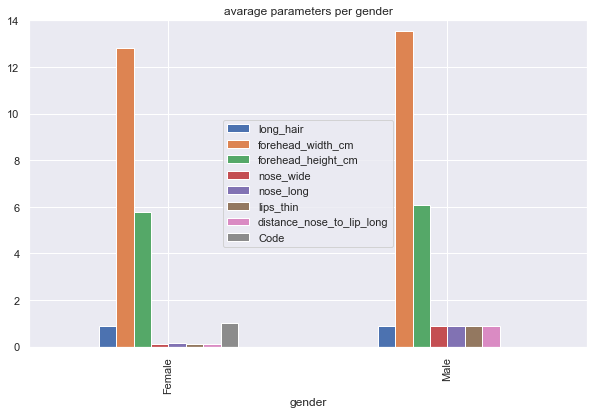

In [52]:
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(20,20))

person.groupby(['gender']).mean().plot(kind='bar',figsize=(10,6))


plt.ylim(0.0, 14.0)
plt.legend(loc='center')

plt

plt.title('avarage parameters per gender')

plt.show()


lets loock at the distribution:

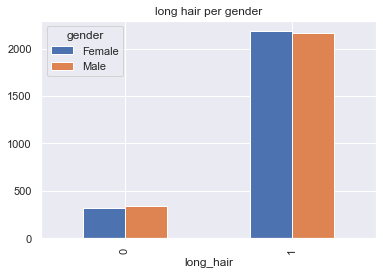

In [53]:
person.groupby(['long_hair','gender']).size().unstack().plot(kind='bar')

plt.title('long hair per gender')
plt.show()

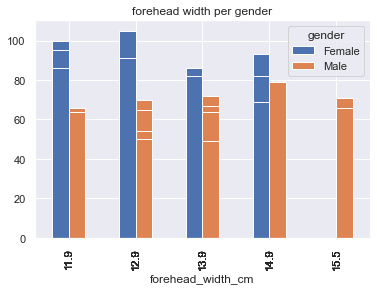

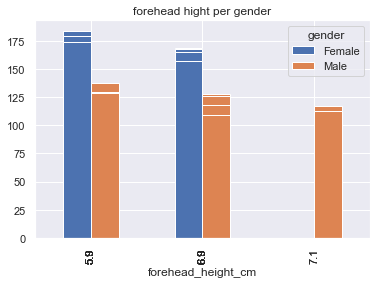

In [54]:
person.groupby(['forehead_width_cm','gender']).size().unstack().plot(kind='bar')
plt.title('forehead width per gender')
person.groupby(['forehead_height_cm','gender']).size().unstack().plot(kind='bar')
plt.title('forehead hight per gender')


plt.show()

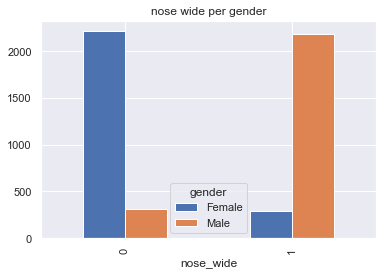

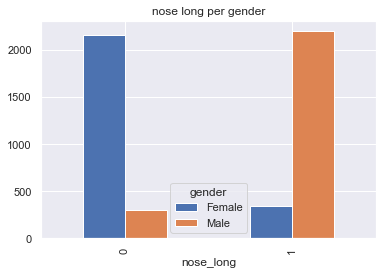

In [190]:
person.groupby(['nose_wide','gender']).size().unstack().plot(kind='bar')
plt.title('nose wide per gender')
person.groupby(['nose_long','gender']).size().unstack().plot(kind='bar')
plt.title('nose long per gender')
plt.show()

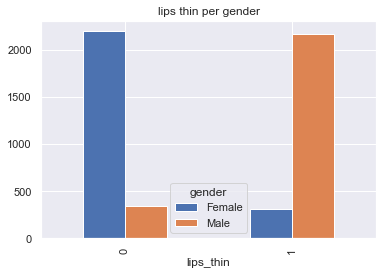

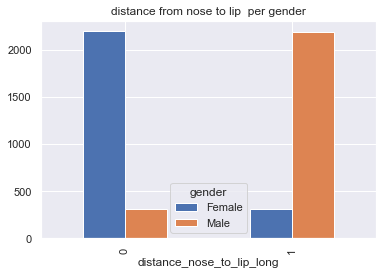

In [196]:
person.groupby(['lips_thin','gender']).size().unstack().plot(kind='bar')
plt.title('lips thin per gender')
person.groupby(['distance_nose_to_lip_long','gender']).size().unstack().plot(kind='bar')
plt.title('distance from nose to lip  per gender')
plt.show()

let see the coroolation between the parameters :

Text(0.5, 1.0, 'Correlation between facial features')

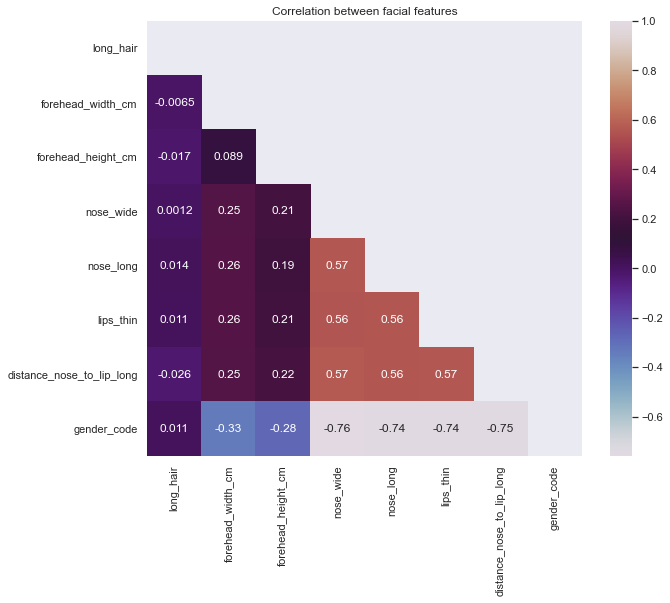

In [178]:

f, ax = plt.subplots(figsize=(10, 8))
corr = person.corr()
sns.heatmap(corr, vmax=1,annot=True,cmap='twilight', mask=mask.T,square=True)

plt.title('Correlation between facial features')

## it can be seen that there is no correlation between the parameters, and therefore one parameter does not indicate another.

train test split

In [180]:
y = person.gender_code.values

x = person[["long_hair","forehead_width_cm","forehead_height_cm","nose_wide","nose_long","lips_thin","distance_nose_to_lip_long"]].values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42)

x_train = x_train.T
x_train=x_train.transpose()
x_test = x_test.T
x_test=x_test.transpose()
y_train = y_train.T
y_test = y_test.T

print("x_train : ",x_train)
print ('x train size is:' ,x_train.shape)
print ()
print("x_test : ",x_test)
print ('x test size is:' ,x_test.shape)
print ()
print("y_train : ",y_train)
print ('y train size is:' ,y_train.shape)
print ()
print("y_test : ",y_test)
print ('y test size is:' ,y_test.shape)
print ()

x_train :  [[ 1.  14.   6.  ...  0.   0.   0. ]
 [ 1.  12.6  6.4 ...  1.   1.   1. ]
 [ 1.  13.1  6.5 ...  1.   1.   1. ]
 ...
 [ 1.  12.   5.9 ...  0.   0.   0. ]
 [ 1.  12.8  5.4 ...  0.   0.   0. ]
 [ 1.  11.4  5.5 ...  0.   0.   0. ]]
x train size is: (3000, 7)

x_test :  [[ 1.  13.2  5.7 ...  1.   1.   1. ]
 [ 1.  13.7  6.  ...  0.   0.   0. ]
 [ 0.  12.9  5.3 ...  0.   0.   1. ]
 ...
 [ 1.  13.9  6.5 ...  0.   0.   0. ]
 [ 1.  11.6  5.3 ...  0.   0.   0. ]
 [ 1.  14.3  5.9 ...  1.   1.   1. ]]
x test size is: (2001, 7)

y_train :  [1 0 0 ... 1 1 1]
y train size is: (3000,)

y_test :  [0 1 1 ... 1 1 0]
y test size is: (2001,)



# knn model:

### We will check in the range of 100 which accutacy we get with specific k, and get jast  the  accuracy above 0.97

In [181]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = list(range(1, 100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    # calculate accuracy
    mas=metrics.accuracy_score(y_test, y_pred)
    if mas>=0.97:
        print('for k=',k,'the accuracy is:', mas)

for k= 15 the accuracy is: 0.9705147426286856
for k= 17 the accuracy is: 0.9705147426286856
for k= 22 the accuracy is: 0.9700149925037481
for k= 23 the accuracy is: 0.9705147426286856
for k= 24 the accuracy is: 0.9710144927536232
for k= 25 the accuracy is: 0.9700149925037481
for k= 27 the accuracy is: 0.9705147426286856
for k= 28 the accuracy is: 0.9700149925037481
for k= 29 the accuracy is: 0.9710144927536232
for k= 31 the accuracy is: 0.9705147426286856
for k= 32 the accuracy is: 0.9710144927536232
for k= 33 the accuracy is: 0.9715142428785607
for k= 34 the accuracy is: 0.9715142428785607
for k= 35 the accuracy is: 0.9705147426286856
for k= 36 the accuracy is: 0.9705147426286856
for k= 37 the accuracy is: 0.9710144927536232
for k= 38 the accuracy is: 0.9715142428785607
for k= 39 the accuracy is: 0.9715142428785607
for k= 40 the accuracy is: 0.9705147426286856
for k= 41 the accuracy is: 0.9710144927536232
for k= 42 the accuracy is: 0.9710144927536232
for k= 43 the accuracy is: 0.97201

It can be seen that the maximum accuracy is about 0.97 so i check wich k gives that:


In [182]:
k_range = list(range(1, 100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mas=metrics.accuracy_score(y_test, y_pred)
    if mas>=0.972:
        print('for k=',k,'the accuracy is:', mas)

for k= 43 the accuracy is: 0.9720139930034982
for k= 49 the accuracy is: 0.9720139930034982
for k= 95 the accuracy is: 0.9720139930034982
for k= 97 the accuracy is: 0.9720139930034982


we can see that all this k gives the same accuracy, **so the final accuraccy is 0.9720139930034982**

 I check if by  doing cross validaion, I can get a better performance:

In [144]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation
knn = KNeighborsClassifier(n_neighbors=38)
print(cross_val_score(knn, x, y, cv=10, scoring='accuracy').mean())

0.9732087824351296


It can be seen that the accuracy is not much different from the accuracy in the "train test split" method, and therefore it is the maximum accuracy


lets calculate the confution metrics

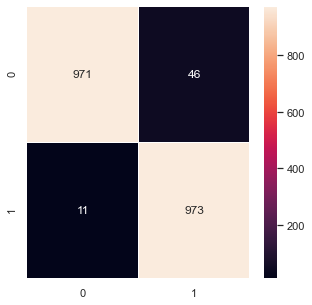

In [188]:
confusion = metrics.confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

f, ax = plt.subplots(figsize = (5,5))
#cm = confusion_matrix(y_test, knn.predict(x_test))
sns.heatmap(confusion,annot = True, linewidth = 0.5, fmt = ".0f", ax = ax)
plt.show()

In [162]:
print('Out of 2001 samples the model was right in',TP+TN,'of the samples and wrong in', FP+FN, 'sampels')
# how often is the classifier correct?
print('Classification Accuracy:',(TP + TN) / float(TP + TN + FP + FN))
#how often is the classifier incorrect?
print('Classification Error:',(FP + FN) / float(TP + TN + FP + FN))

Out of 2001 samples the model was right in 1944 of the samples and wrong in 57 sampels
Classification Accuracy: 0.9715142428785607
Classification Error: 0.02848575712143928


## to do:
another model. 
Improve visibility
